#### **Welcome to Assignment 2 on Deep Learning for Computer Vision.**
In this assignment you will get a chance to implement basic image processing tasks like Edge Detection and Corner Detection.

#### **Instructions**
1. Use Python 3.x to run this notebook
3. Write your code only in between the lines 'YOUR CODE STARTS HERE' and 'YOUR CODE ENDS HERE'. You should not change anything else. If you do, the answers you are supposed to get at the end of this assignment might be wrong.
4. Read the documentation of each function carefully.

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# %matplotlib inline uncomment this line if you're running this notebook on your local PC

In [ ]:
# DO NOT CHANGE THIS CODE
np.random.seed(0)

In [ ]:
def standardize(image):
    eps = 1e-5  # some fields have all 255 so variance will be 0, to avoid division by zero, introduced eps
    return (image - np.mean(image))/(np.std(image)+eps)

In [ ]:
# DO NOT CHANGE THIS CODE
# Linear Filtering technique on an image using a linear filter
def linear_filter(image, filter_): # 'filter' is a keyword in python, so is the underscore at the end.
    """
    Performs linear filtering on an image.
    Assume image size is W1xW2, filter size is F1xF2.

    Arguments:
    image -- input image possibly with 3 channels(RGB).
    filter_ -- linear filter to apply on image.

    Returns:
    result -- filtered image.
    """
    image = np.array(image.convert('L')) # converts image to gray scale, so that it is easy to apply filter
    image_height, image_width = image.shape[0], image.shape[1]

    filter_ = np.array(filter_.convert('L'))
    filter_height, filter_width = filter_.shape[0], filter_.shape[1]

    # result shape will be of size --> (((W1−F1+2P) / S) + 1) x (((W2−F2+2P) / S) + 1), where 'P' is padding length
    # S is stride length, if you don't know about them, don't worry, you will learn in upcoming lectures.For now
    # we will use simplest setting P=0,S=1. See the next line.

    result_height, result_width = (image_height - filter_height) + 1, (image_width - filter_width) + 1
    result = np.array([[0 for j in range(result_width)] for i in range(result_height)])
    for i in range(result_height):
        for j in range(result_width):
            temp = standardize(image[i:filter_height+i, j:filter_width+j]) * filter_
            try:
                result[i][j] = np.sum(temp)
            except ValueError as err:
                print("something went wrong", err)
                sys.exit()

    return result

In [ ]:
# DO NOT CHANGE THIS CODE
# Convolution on an image using a filter/kernel
def convolution2D(image, kernel):
    """
    Performs convolution on an image using a kernel.

    Arguments:
    image -- 2D matrix representing image.
    kernel -- kernel to apply on image.

    Returns:
    result -- filtered image.
    """
    #print(kernel)
    kernel_new = kernel.transpose(Image.FLIP_TOP_BOTTOM).transpose(Image.FLIP_LEFT_RIGHT)
    #print(kernel_new)
    result = linear_filter(image,kernel_new)
    return result

### Question 1: Sobel Filter
In this question you'll have to apply a Sobel Filter to the provided image and report the index of min and max value of the final output.


In [ ]:
from matplotlib import cm
from numpy import unravel_index
image = Image.open('edges_image.png').convert('L')

###YOUR CODE STARTS HERE

# Define 3*3 Vertical sobel filter (Hint: refer lecture slides)
sobel_v = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

#Define 3*3 Horizontal sobel filter (Hint: refer lecture slides)
sobel_h = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])


#compute vertical response using convolution2D function
response_v = convolution2D(image, Image.fromarray(np.uint8(cm.gist_earth(sobel_v)*255)))

#compute horizontal response using convolution2D function
response_h = convolution2D(image, Image.fromarray(np.uint8(cm.gist_earth(sobel_h)*255)))

#compute final response
# G = |G_x| + |G_y|
G = np.abs(response_h) + np.abs(response_v)

#compute index of min and max value of G
print(unravel_index(G.argmin(), G.shape))
print(unravel_index(G.argmax(), G.shape))
###YOUR CODE ENDS HERE


<PIL.Image.Image image mode=RGBA size=3x3 at 0x7EFEFB334640>
<PIL.Image.Image image mode=RGBA size=3x3 at 0x7EFEFB3BBB50>
<PIL.Image.Image image mode=RGBA size=3x3 at 0x7EFEFB334610>
<PIL.Image.Image image mode=RGBA size=3x3 at 0x7EFEFB3BAB00>
(0, 0)
(108, 107)


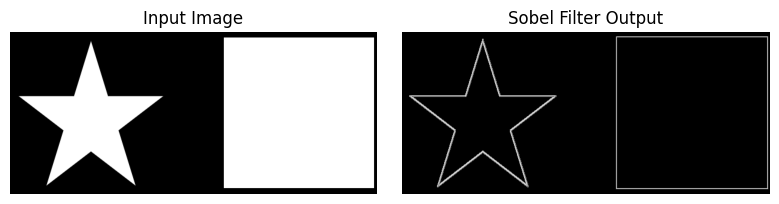

In [ ]:
# DO NOT CHANGE THIS CODE
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input Image')

ax[1].imshow(G, cmap='gray')
ax[1].set_title('Sobel Filter Output')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

What are index of the min and max values in the `G` image?

1. $(52, 147), (111, 26)$
2. $(0, 0), (108, 107)$
3. $(56, 152), (116, 18)$
4. $(51, 143), (114, 24)$

### Question 2: Laplacian Filter

In this question you'll have to apply a Laplacian Filter to the provided image and report the index of min and max value of the final output.

What are index of the min and max values of the Laplacian Filter response to the provided image?



In [ ]:
image = Image.open('edges_image.png').convert('L')

###YOUR CODE STARTS HERE

# Define 3*3 Laplace filter (Hint: refer lecture slides)
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

#compute response using convolution2D function
response_L = convolution2D(image, Image.fromarray(np.uint8(cm.gist_earth(laplacian_filter)*255)))

#compute index of min and max value of Laplace Filter response
print(unravel_index(response_L.argmin(), response_L.shape))
print(unravel_index(response_L.argmax(), response_L.shape))
###YOUR CODE ENDS HERE

<PIL.Image.Image image mode=RGBA size=3x3 at 0x7EFEFB395E70>
<PIL.Image.Image image mode=RGBA size=3x3 at 0x7EFF329663E0>
(203, 136)
(17, 136)


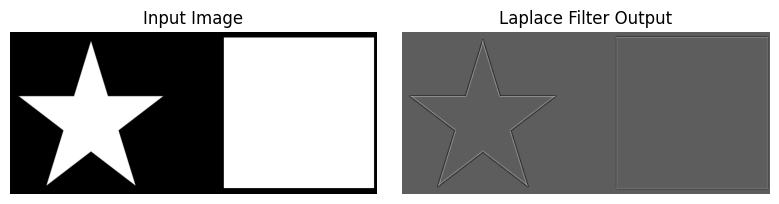

In [ ]:
# DO NOT CHANGE THIS CODE
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 2))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input Image')

ax[1].imshow(response_L, cmap='gray')
ax[1].set_title('Laplace Filter Output')

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

What are index of the min and max values in the `response_L` image?

1. $(4, 117), (111, 26)$
2. $(49, 176), (110, 27)$
3. $(203, 136), (17, 136)$
4. $(10, 104), (106, 22)$

### Question 3: Harris Corner Detection Algorithm

Find the number of detected corner points in a given image using Harris Corner Detection Algorithm. Note that, the following criterion MUST be satisfied while applying Harris Corner detection Algorithm:

1. The size of neighbourhood considered for corner detection = 2.
2. Aperture parameter of Sobel derivative used = 3.
3. Harris detector free parameter in the equation = 0.04.

How many corners are detected?

1. 1585
2. 1600
3. 1676
4. 1500

Number of Detected Corners:  1676


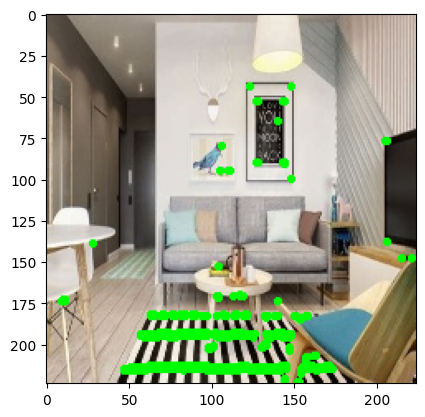

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('corner_image.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

###YOUR CODE STARTS HERE

## STEP 1:  Convert to grayscale (Hint: use cv2.cvtColor)
gray_img = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray_img = np.float32(gray_img)

## STEP 2: Detect corners (Hint:  cv2.cornerHarris)
dilst = cv2.cornerHarris(gray_img, 2, 3, 0.04)

## STEP 3: Dilate corner image to enhance corner points (Hint: use cv2.dilate)
dilst = cv2.dilate(dilst,None)
plt.imshow(dilst, cmap='gray')

## STEP 4:set threshold value as 0.1 * (maximum value of dilated corner image obtained from STEP3)
thresh = 0.1 * dilst.max()

## STEP 5: Count numer of detected corner points and draw them on the image
corner_image = np.copy(image_copy)

count = 0
for j in range(0, dilst.shape[0]):
    for i in range(0, dilst.shape[1]):
        if(dilst[j,i] > thresh):
            count += 1
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

print ("Number of Detected Corners: ", count)
plt.imshow(corner_image)

### YOUR CODE ENDS HERE